Goal : encontrar la razon del absenteism para mejorar productividad

Hipótesis, suposiciones iniciales, cosas a probar:
 1. relación fuerte con la Reason for Absence y Absenteeism Time in Hours
 2. análisis de correlaciones


Preguntas

- Como medir absenteism
- Como determinar un exceso de absenteism
- Que variables tienen más relacion con el absenteism
- Que grupos presentan mas absenteism



In [41]:
import pandas as pd
data = pd.read_csv("data_clean.csv")
data

,Unnamed: 0,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Year,Day of week
0,0,11,4,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,2015,1
1,1,36,4,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,2015,1
2,2,3,4,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2015,2
3,3,7,1,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,2015,3
4,4,11,4,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,674,17,1,2018-05-23,179,22,40,237.656,22,2,2,0,8,5,2018,2
675,675,28,1,2018-05-23,225,26,28,237.656,24,1,1,2,3,5,2018,2
676,676,18,1,2018-05-24,330,16,28,237.656,25,2,0,0,8,5,2018,3
677,677,25,4,2018-05-24,235,16,32,237.656,25,3,0,0,2,5,2018,3


In [42]:
data = data.drop("Unnamed: 0", axis=1)

# 1. Análisis grouping by category = Reason for abssence

In [43]:
# cambie el nombre de todas las columnas porque es más fácil selecionar uno así
data.columns = [col.replace(' ', '_') for col in data.columns]
data


,ID,Reason_for_Absence,Date,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Education,Children,Pets,Absenteeism_Time_in_Hours,Month,Year,Day_of_week
0,11,4,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,2015,1
1,36,4,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,2015,1
2,3,4,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2015,2
3,7,1,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,2015,3
4,11,4,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,17,1,2018-05-23,179,22,40,237.656,22,2,2,0,8,5,2018,2
675,28,1,2018-05-23,225,26,28,237.656,24,1,1,2,3,5,2018,2
676,18,1,2018-05-24,330,16,28,237.656,25,2,0,0,8,5,2018,3
677,25,4,2018-05-24,235,16,32,237.656,25,3,0,0,2,5,2018,3


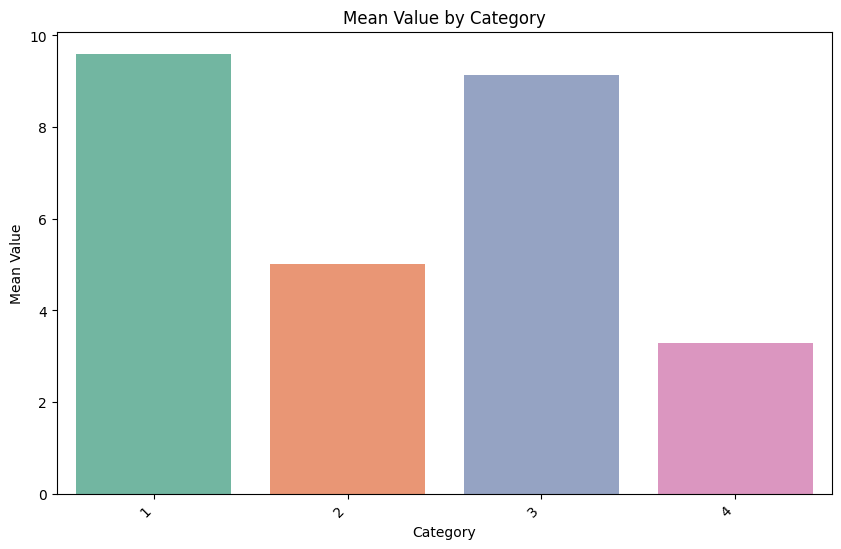

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


# Group the data by 'Category' and calculate the mean for each group
grouped = data.groupby('Reason_for_Absence')['Absenteeism_Time_in_Hours'].mean().reset_index()


# Create a color mapping based on Y values
value_color_mapping = {}
color_palette = sns.color_palette("Set2", len(grouped))

for i, (category, value) in enumerate(zip(grouped['Reason_for_Absence'], grouped['Absenteeism_Time_in_Hours'])):
    if value not in value_color_mapping:
        value_color_mapping[value] = color_palette[i]

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a bar plot with colors based on Y values
colors = [value_color_mapping[value] for value in grouped['Absenteeism_Time_in_Hours']]
ax = sns.barplot(x='Reason_for_Absence', y='Absenteeism_Time_in_Hours', data=grouped, palette=colors)

# Customize x-axis ticks to show every category
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.title('Mean Value by Category')

# Show the plot
plt.show()



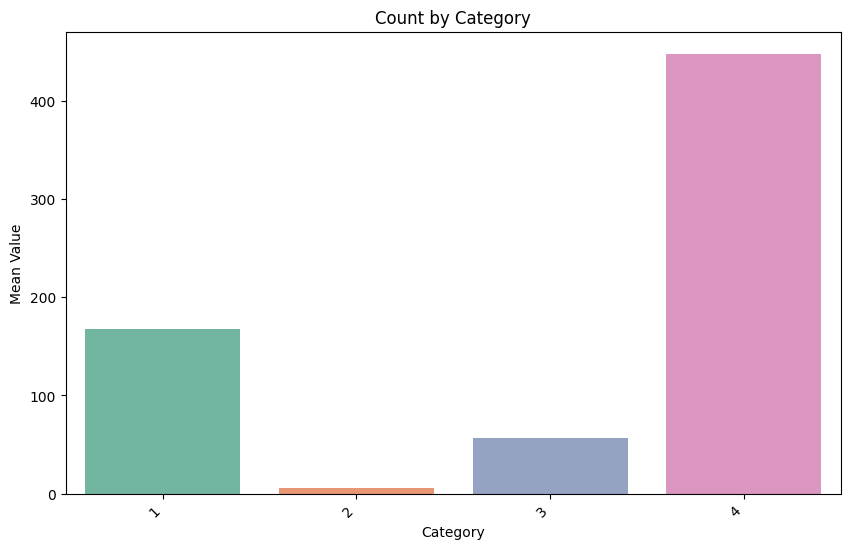

In [56]:
# Group the data by 'Category' and calculate the mean for each group
grouped = data.groupby('Reason_for_Absence')['Absenteeism_Time_in_Hours'].count().reset_index()


# Create a color mapping based on Y values
value_color_mapping = {}
color_palette = sns.color_palette("Set2", len(grouped))

for i, (category, value) in enumerate(zip(grouped['Reason_for_Absence'], grouped['Absenteeism_Time_in_Hours'])):
    if value not in value_color_mapping:
        value_color_mapping[value] = color_palette[i]

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a bar plot with colors based on Y values
colors = [value_color_mapping[value] for value in grouped['Absenteeism_Time_in_Hours']]
ax = sns.barplot(x='Reason_for_Absence', y='Absenteeism_Time_in_Hours', data=grouped, palette=colors)

# Customize x-axis ticks to show every category
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Mean Value')
plt.title('Count by Category')

# Show the plot
plt.show()

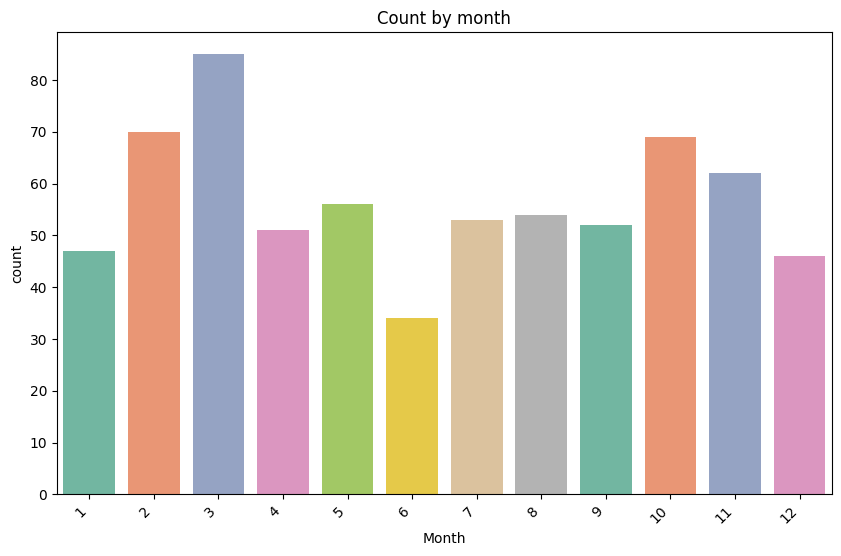

In [62]:
# Group the data by 'Category' and calculate the mean for each group
grouped = data.groupby('Month')['Absenteeism_Time_in_Hours'].count().reset_index()


# Create a color mapping based on Y values
value_color_mapping = {}
color_palette = sns.color_palette("Set2", len(grouped))

for i, (category, value) in enumerate(zip(grouped['Month'], grouped['Absenteeism_Time_in_Hours'])):
    if value not in value_color_mapping:
        value_color_mapping[value] = color_palette[i]

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a bar plot with colors based on Y values
colors = [value_color_mapping[value] for value in grouped['Absenteeism_Time_in_Hours']]
ax = sns.barplot(x='Month', y='Absenteeism_Time_in_Hours', data=grouped, palette=colors)

# Customize x-axis ticks to show every category
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('count')
plt.title('Count by month')

# Show the plot
plt.show()

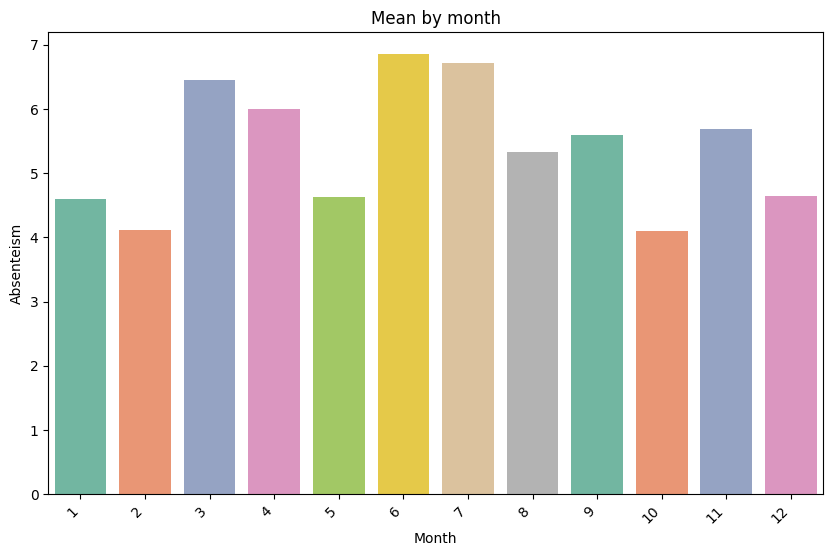

In [65]:
# Group the data by 'Category' and calculate the mean for each group
grouped = data.groupby('Month')['Absenteeism_Time_in_Hours'].mean().reset_index()


# Create a color mapping based on Y values
value_color_mapping = {}
color_palette = sns.color_palette("Set2", len(grouped))

for i, (category, value) in enumerate(zip(grouped['Month'], grouped['Absenteeism_Time_in_Hours'])):
    if value not in value_color_mapping:
        value_color_mapping[value] = color_palette[i]

# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create a bar plot with colors based on Y values
colors = [value_color_mapping[value] for value in grouped['Absenteeism_Time_in_Hours']]
ax = sns.barplot(x='Month', y='Absenteeism_Time_in_Hours', data=grouped, palette=colors)

# Customize x-axis ticks to show every category
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Absenteism')
plt.title('Mean by month')

# Show the plot
plt.show()

# 1.2 Visualizar 3 variables

<Axes: xlabel='Month', ylabel='Absenteeism_Time_in_Hours'>

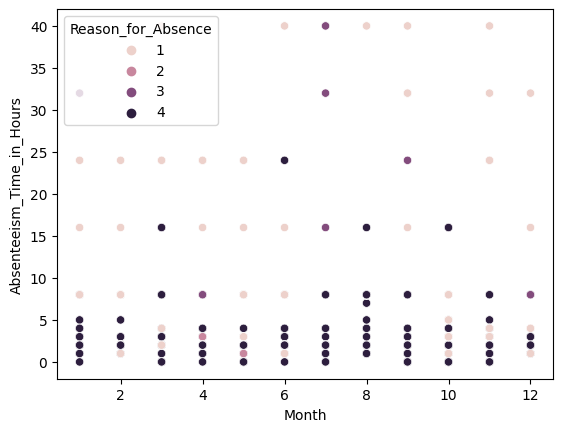

In [64]:
sns.scatterplot(x = data["Month"], y= data["Absenteeism_Time_in_Hours"], hue = data["Reason_for_Absence"] )

- Reason 1: Disease
- Reason 2: Pregancy
- Reason 3: Health symptoms
- Reason 4: Appointments o sin justificación

Conclusiones
- Las razones relaciones con la salud son las que toman más tiempo
- Los appointments o sin justificación son las razones más comunes de ausencia aunque son de tiempo corto
- En junio es cuando existe más productividad
- Los meses con más ausencias son Feb, Marzo y Octubre.

# 2. Análisis de correlaciones

2.1 Seleccionar variable numericas

Recuerda que debes excluir fechas, categorical variables, id y cualquier variable no numerica

In [45]:
data

,ID,Reason_for_Absence,Date,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Education,Children,Pets,Absenteeism_Time_in_Hours,Month,Year,Day_of_week
0,11,4,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,2015,1
1,36,4,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,2015,1
2,3,4,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2015,2
3,7,1,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,2015,3
4,11,4,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,17,1,2018-05-23,179,22,40,237.656,22,2,2,0,8,5,2018,2
675,28,1,2018-05-23,225,26,28,237.656,24,1,1,2,3,5,2018,2
676,18,1,2018-05-24,330,16,28,237.656,25,2,0,0,8,5,2018,3
677,25,4,2018-05-24,235,16,32,237.656,25,3,0,0,2,5,2018,3


In [46]:
numerical_data = ["Transportation_Expense","Distance_to_Work", "Age", "Daily_Work_Load_Average","Body_Mass_Index", "Children","Pets","Absenteeism_Time_in_Hours" ]

corr_data = data[numerical_data]

correlation_matrix = corr_data.corr()
correlation_matrix

,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Children,Pets,Absenteeism_Time_in_Hours
Transportation_Expense,1.000000,0.218652,-0.225848,0.017223,-0.138055,0.380783,0.443806,0.140539
Distance_to_Work,0.218652,1.000000,-0.123796,-0.072628,0.140759,0.044048,0.167557,-0.004343
Age,-0.225848,-0.123796,1.000000,-0.046888,0.493372,0.047291,-0.253023,-0.038667
Daily_Work_Load_Average,0.017223,-0.072628,-0.046888,1.000000,-0.105522,0.032208,0.015802,0.125095
Body_Mass_Index,-0.138055,0.140759,0.493372,-0.105522,1.000000,-0.154298,-0.064332,-0.044189
Children,0.380783,0.044048,0.047291,0.032208,-0.154298,1.000000,0.114551,0.093852
Pets,0.443806,0.167557,-0.253023,0.015802,-0.064332,0.114551,1.000000,-0.010841
Absenteeism_Time_in_Hours,0.140539,-0.004343,-0.038667,0.125095,-0.044189,0.093852,-0.010841,1.000000


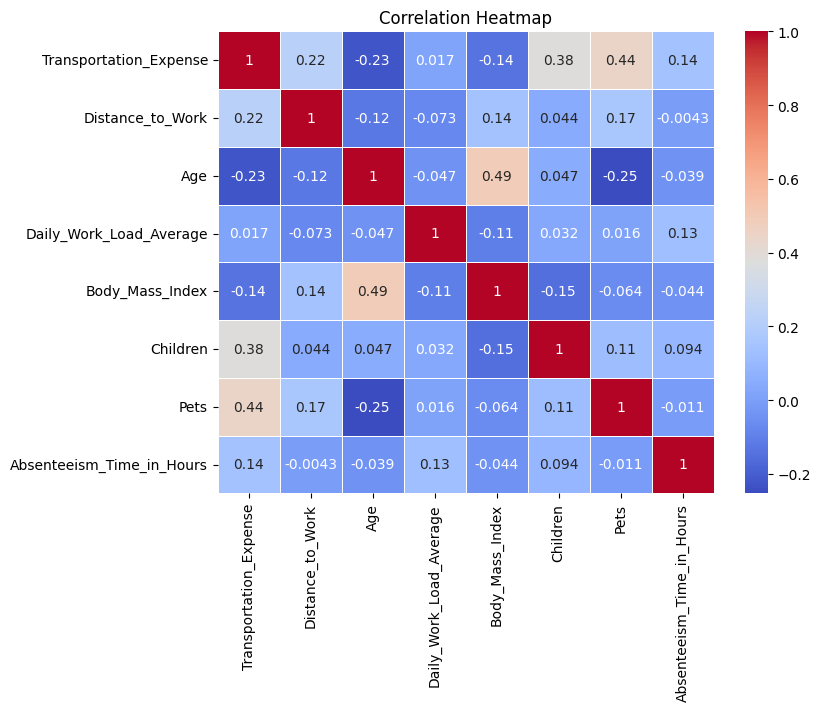

In [47]:
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

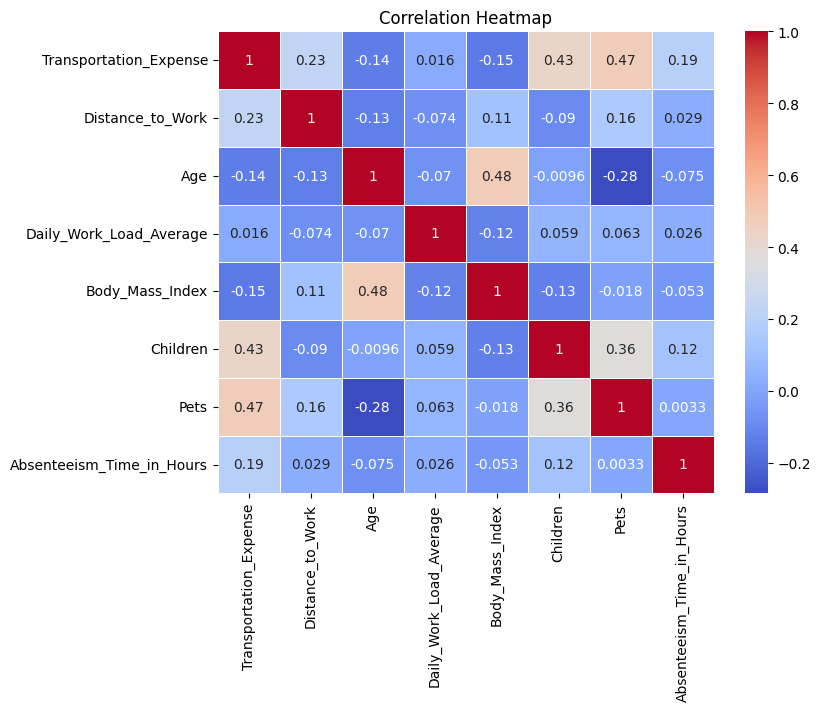

In [48]:
correlation_matrix_spearman = corr_data.corr(method='spearman')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# 2.2: Medir statistical signifcance de los coeficientes de correlations matrix

In [49]:
# Number of observations (sample size)
import numpy as np
from scipy import stats

n = len(corr_data)

# Initialize an empty matrix to store p-values
p_values = np.empty_like(correlation_matrix)

# Loop through the correlation matrix and calculate p-values
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        if i != j:
            corr_coeff = correlation_matrix.iloc[i, j]
            r_squared = corr_coeff ** 2  # Square the correlation coefficient to calculate R-squared
            # Calculate t-statistic and p-value
            t_statistic = (corr_coeff * np.sqrt(n - 2)) / np.sqrt(1 - r_squared)
            p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=n - 2))
            p_values[i, j] = p_value
        else:
            p_values[i, j] = 1.0  # Diagonal elements (correlation with itself)

# Create a DataFrame to display p-values associated with correlations
p_values_df = pd.DataFrame(p_values, columns=correlation_matrix.columns, index=correlation_matrix.columns)

# Display the p-values
print("P-Values:")
print(p_values_df)

P-Values:
                           Transportation_Expense  Distance_to_Work  \
Transportation_Expense               1.000000e+00      8.569280e-09   
Distance_to_Work                     8.569280e-09      1.000000e+00   
Age                                  2.660396e-09      1.227868e-03   
Daily_Work_Load_Average              6.541616e-01      5.855442e-02   
Body_Mass_Index                      3.085236e-04      2.337616e-04   
Children                             0.000000e+00      2.517036e-01   
Pets                                 0.000000e+00      1.137911e-05   
Absenteeism_Time_in_Hours            2.391461e-04      9.100668e-01   

                                    Age  Daily_Work_Load_Average  \
Transportation_Expense     2.660396e-09                 0.654162   
Distance_to_Work           1.227868e-03                 0.058554   
Age                        1.000000e+00                 0.222390   
Daily_Work_Load_Average    2.223896e-01                 1.000000   
Body_Mass_

In [50]:
#redondear a 5 decimales
p_values_df = p_values_df.applymap(lambda x: format(x, '.5f'))
p_values_df

,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Children,Pets,Absenteeism_Time_in_Hours
Transportation_Expense,1.00000,0.00000,0.00000,0.65416,0.00031,0.00000,0.00000,0.00024
Distance_to_Work,0.00000,1.00000,0.00123,0.05855,0.00023,0.25170,0.00001,0.91007
Age,0.00000,0.00123,1.00000,0.22239,0.00000,0.21843,0.00000,0.31437
Daily_Work_Load_Average,0.65416,0.05855,0.22239,1.00000,0.00592,0.40207,0.68105,0.00109
Body_Mass_Index,0.00031,0.00023,0.00000,0.00592,1.00000,0.00005,0.09393,0.25018
Children,0.00000,0.25170,0.21843,0.40207,0.00005,1.00000,0.00280,0.01443
Pets,0.00000,0.00001,0.00000,0.68105,0.09393,0.00280,1.00000,0.77796
Absenteeism_Time_in_Hours,0.00024,0.91007,0.31437,0.00109,0.25018,0.01443,0.77796,1.00000


In [51]:
# Convert all cells to float (convert non-numeric values to NaN)
p_values_df = p_values_df.apply(pd.to_numeric, errors='coerce')

In [52]:
# Define a custom function to replace values
def replace_value(x):
    if isinstance(x, float) and x >= 0.05:
        #print("float")
        return "NS"
    else:
        return x
        #print("string")
    

# Apply the custom function to each cell of the DataFrame
df_result = p_values_df.applymap(replace_value)

In [53]:
df_result

,Transportation_Expense,Distance_to_Work,Age,Daily_Work_Load_Average,Body_Mass_Index,Children,Pets,Absenteeism_Time_in_Hours
Transportation_Expense,NS,0.0,0.0,NS,0.00031,0.0,0.0,0.00024
Distance_to_Work,0.0,NS,0.00123,NS,0.00023,NS,0.00001,NS
Age,0.0,0.00123,NS,NS,0.0,NS,0.0,NS
Daily_Work_Load_Average,NS,NS,NS,NS,0.00592,NS,NS,0.00109
Body_Mass_Index,0.00031,0.00023,0.0,0.00592,NS,0.00005,NS,NS
Children,0.0,NS,NS,NS,0.00005,NS,0.0028,0.01443
Pets,0.0,0.00001,0.0,NS,NS,0.0028,NS,NS
Absenteeism_Time_in_Hours,0.00024,NS,NS,0.00109,NS,0.01443,NS,NS


# 2.3 Conclusiones de análisis entre variables numéricas
Las únicas relaciones significantes con Absenteeism_Time_in_Hours solo son:
- Transportation_Expense: coef = 0.19
- Children: coef = 0.14

No obstante son *relaciones muy débiles*

Asimismo existen relaciones significantes pero moderadas entre las siguientes variables:

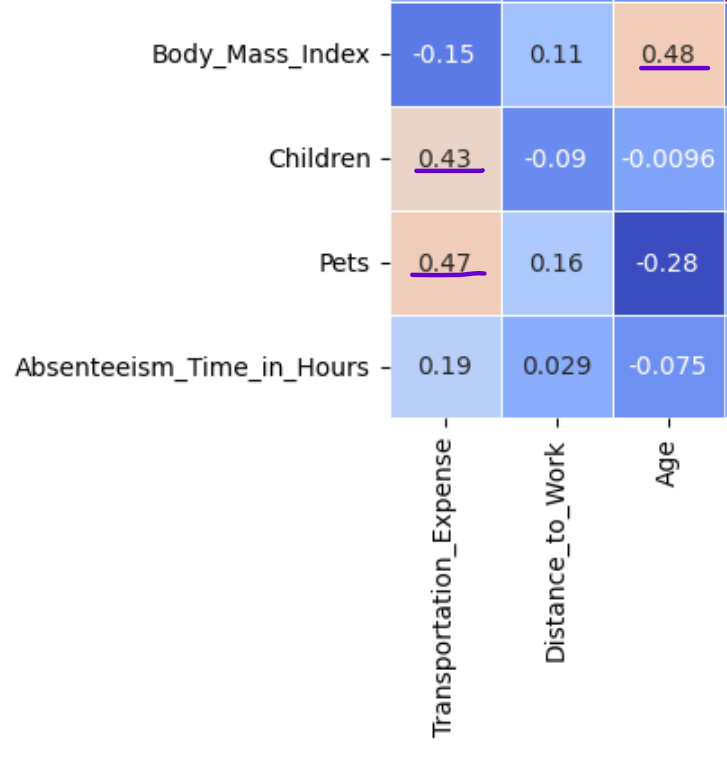